<a href="https://colab.research.google.com/github/anujvaghani0/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline-Passenger-Referral-Prediction**

### **Data includes airline reviews from 2006 to 2019 for popular airlines around the world withmultiple choice and free text questions. Data is scraped in Spring 2019. The main objectiveis to predict whether passengers will refer the airline to their friends.**

**Airline companies are always looking for ways to attract new customers and retain existing ones. One of the most effective methods is through referral programs that offer incentives to current customers who refer new passengers. In this project, we aim to predict which passengers are most likely to refer others to the airline.**

**We will use a dataset containing information about past passengers, including demographics, flight history, and loyalty program participation. We will also have access to data on whether these passengers referred others and, if so, how many. Our goal is to use this data to build a predictive model that can accurately identify which passengers are most likely to make referrals.**

**To achieve this, we will use various machine learning algorithms, including logistic regression, decision trees, and random forests. We will evaluate the performance of these models using metrics such as accuracy, precision, and recall. Finally, we will select the best-performing model and use it to make predictions on new data.**

**The results of this project can help airlines target their referral programs to the passengers who are most likely to participate, thereby increasing customer acquisition and retention.**

 Github Link : **https://github.com/anujvaghani0/Airline-Passenger-Referral-Prediction**

# **Feature descriptions briefly as follows:**


**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**review date:** Date of the Review

**customer review:**Review of the customers in free text format

**aircraft:** Type of the aircraft

**traveller type:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5 

**entertainment:** Rated between 1-5

**ground service:** Rated between 1-5

**value for money:** Rated between 1-5

**recommended:** Binary, target variable.

# **Objective**

**The objective of this project is to predict whether a passenger will refer an airline to others based on their demographic and flight-related data. By identifying potential advocates who are more likely to refer the airline to others, airlines can improve customer satisfaction and loyalty, attract new customers, and tailor their marketing strategies and loyalty programs to target these customers.**

**To achieve this objective, we will use a dataset that includes past passengers and their referral behavior, as well as various features such as age, gender, flight class, and route information. We will preprocess the data, perform exploratory data analysis, and use machine learning algorithms such as logistic regression, random forest, and support vector machines to predict the likelihood of a passenger becoming a referral. We will also perform feature engineering and selection to improve the performance of our models.**

**The ultimate goal of this project is to provide insights for airlines to improve customer satisfaction and loyalty, increase referrals, and ultimately grow their business. By predicting which passengers are more likely to refer the airline, airlines can take proactive measures to address any issues and improve the overall customer experience.**

# **Loading Dataset and Importing Modules**

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import lightgbm

import warnings
warnings.filterwarnings('ignore')

In [4]:

# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
     

# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

#**Reading the Dataset**

In [5]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#load the dataset from drive 
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data_airline_reviews.xlsx')

In [7]:
df.shape

(131895, 17)

## **Understand More About The Data**

In [8]:
#Column names of the dataset
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [9]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [10]:
#Checking the unique values of the recommended column(target variable)
df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [11]:
#check the unique value
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [12]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Duplicate values**

In [13]:
#counting  number of duplicated values 
df.duplicated().sum()

70711

In [14]:
#droping the null values
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


# **Null Values**

**We can infer from the last five rows of the dataset that it contains missing or null values. In order to further investigate, we will check the number of null values present in each column of the dataset.**

In [17]:
#Checking the null value count for each column
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [18]:
#Overall discription of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


# **Exploratory Data Analysis And Visualization (EDA)**

## **Questions**


**1.Is it Solo Leisure worth for Money?**

**2.Which type of Cabin has more recommendation?**

**3.Which Traveller_type has more ratings?**

**4.In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?**

**5.Which cabin type has more service ratings?**

**6.Which cabin type has overall service ratings?**

**7.Which travellers_type has overall service ratings?**

**8.Which airline made highest trips?**

**9.Comparison of all independent variable/features?**

## **(1) Is it Solo Leisure worth for Money?**

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

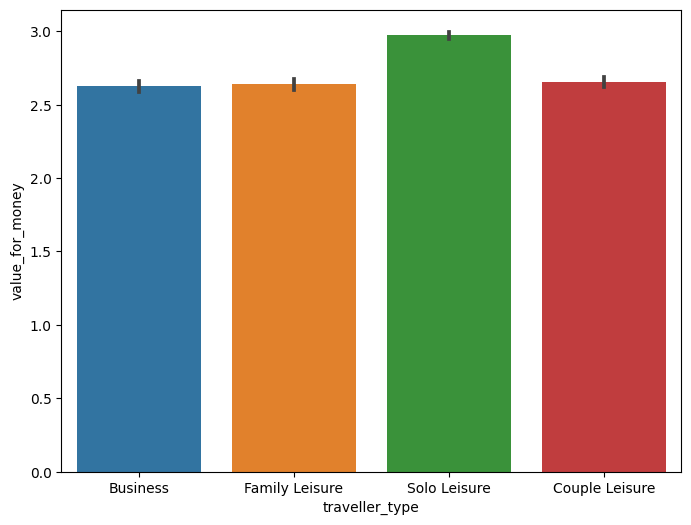

In [19]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x='traveller_type',y='value_for_money',data=df)

**From above plot Yes,Travelling Type of Solo Leisure worth of Money compare to other type of travelling.**

# **(2)Which type of Cabin has more recommendation?**

<Axes: xlabel='cabin', ylabel='count'>

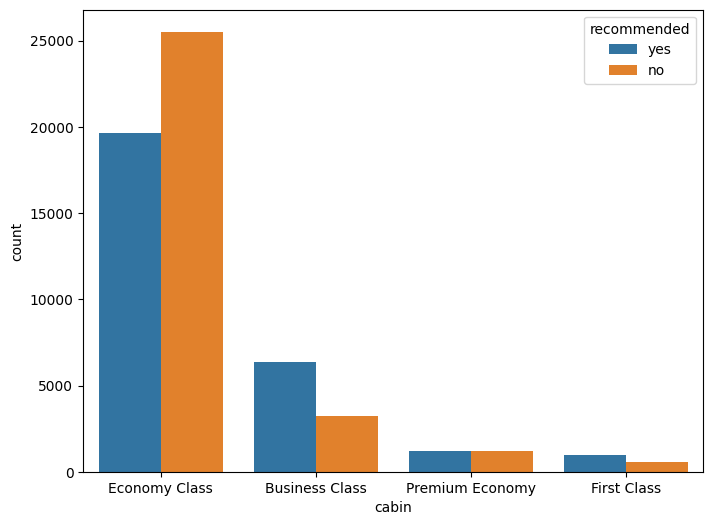

In [20]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(x='cabin',hue='recommended',data=df)

* Economy class has highest recommendation with bad reviews.

* Business class has second most recommended cabin type with good reviews.

* premium economy has equal reviews.

* first class is least recommend cabin type with good reviews.

# **(3) Which Traveller_type has more ratings?**

<Axes: xlabel='traveller_type', ylabel='count'>

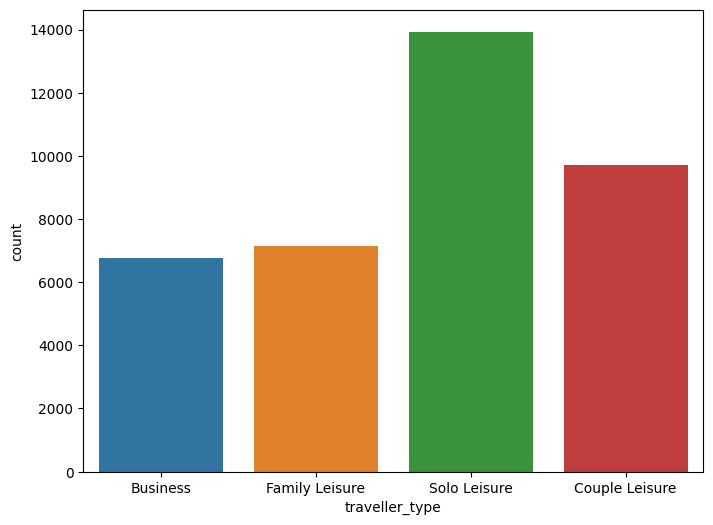

In [21]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(x='traveller_type',data=df)

**Travelling type of Solo Leisure has more ratings**

# **(4) In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?**

In [22]:
#performing the grouphby method 
eda4=df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda4

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

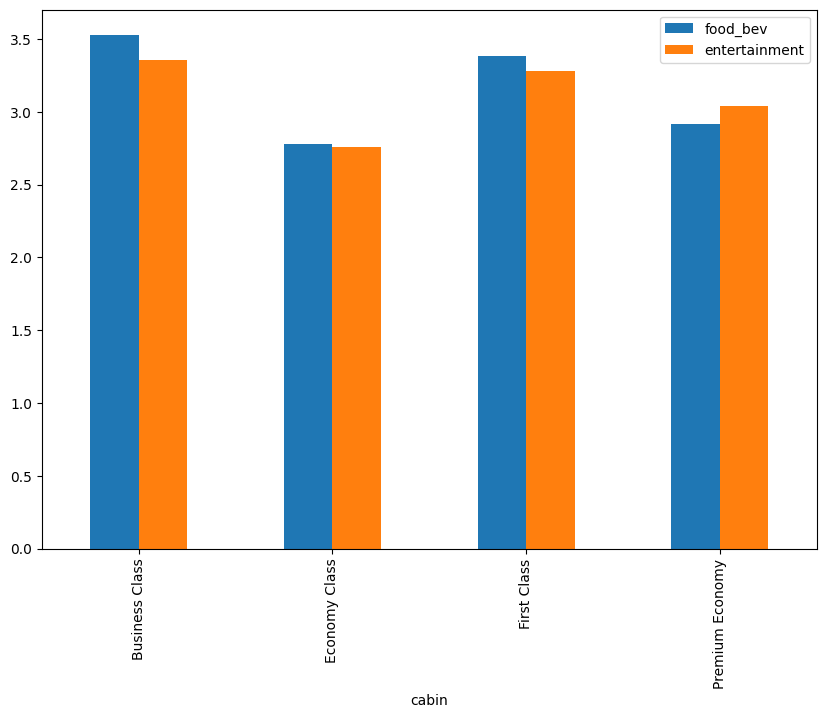

In [23]:
plt.rcParams['figure.figsize']=(10,7)
eda4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

**In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.**

# **(5) Which cabin type has more service ratings?**

<Axes: xlabel='cabin', ylabel='cabin_service'>

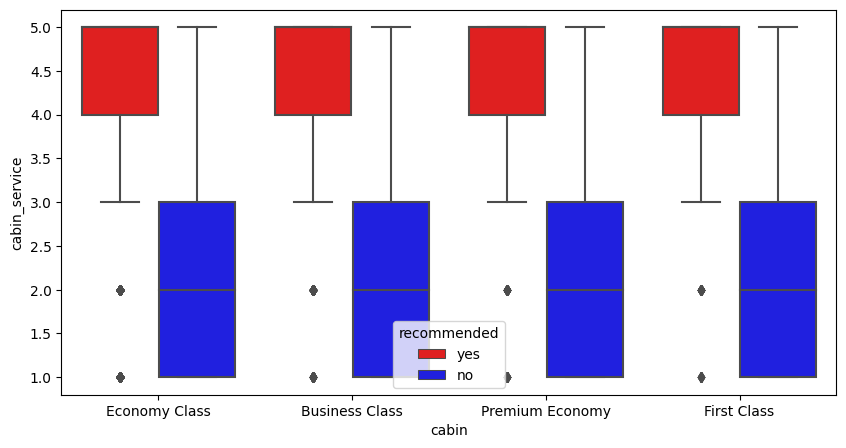

In [24]:
#Cabin type and cabin service ratings
plt.figure(figsize=(10,5))
sns.boxplot(x='cabin', y='cabin_service', hue ='recommended',data=df, palette= ['red','blue'])

**First class travellers are least likely to recommend the airlines.**

**Recommendation is most probable when the cabin service is given full star rating ie 5 out of 5 here.**

**In economy class if we got ratings between 4 to 5 that means airlines recommended.**

# **(6) Which cabin type has overall service ratings?**

<Axes: xlabel='cabin', ylabel='overall'>

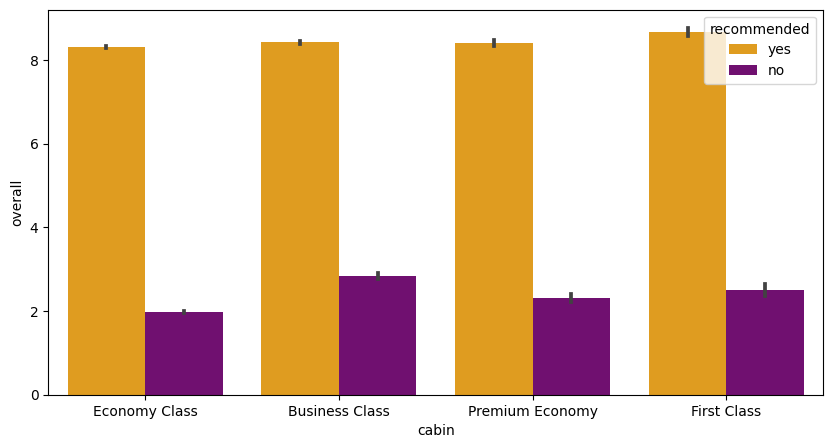

In [25]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.barplot(x='cabin', y='overall', hue ='recommended',data=df, palette= ['orange','purple'])

**If the trip is rated above 8 for overall section, the trip is most likely be recommended by the travellers.**

**If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type.**

# **(7) Which travellers_type has overall service ratings?**

<Axes: xlabel='traveller_type', ylabel='overall'>

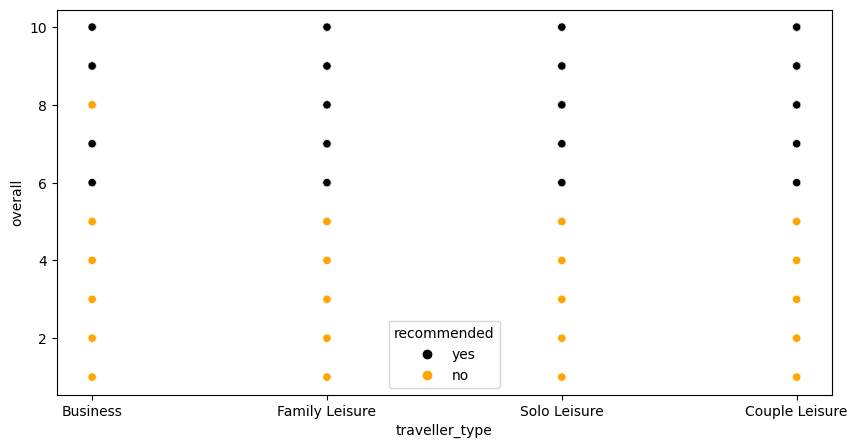

In [26]:
#Traveller type and overall service ratings (out of 10 )
plt.figure(figsize=(10,5))
sns.scatterplot(x='traveller_type', y='overall', hue ='recommended',data=df, palette= ['black','orange'])

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

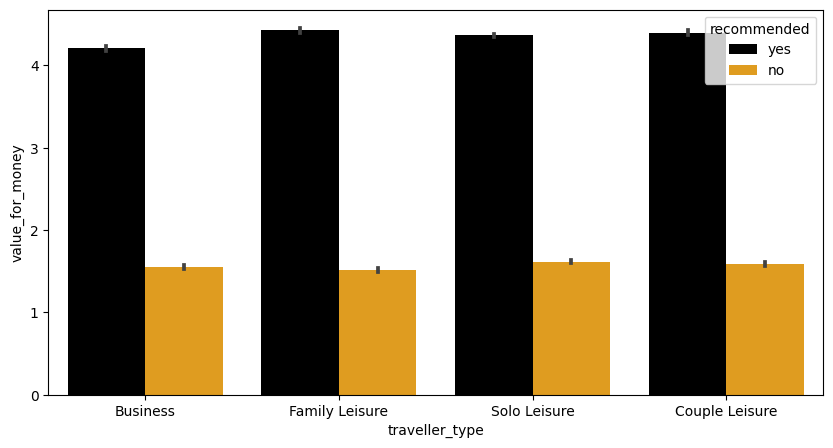

In [27]:
#Traveller type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.barplot(x='traveller_type', y='value_for_money', hue ='recommended',data=df, palette= ['black','orange'])

**When the cabin_Service is rated 5, it is highly likely that the reviewer has recommended the airlines to travel irrespective of the type of cabin.**

**Economy class is the most recommended cabin type, whereas business class is the least recommended one**

# **(8)Which airline made highest trips?**

In [28]:
# Get the number of trips each airline make.
trip_by_airlines = df['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

**Getting more visualized view of top 10 airlines trip through graph.**

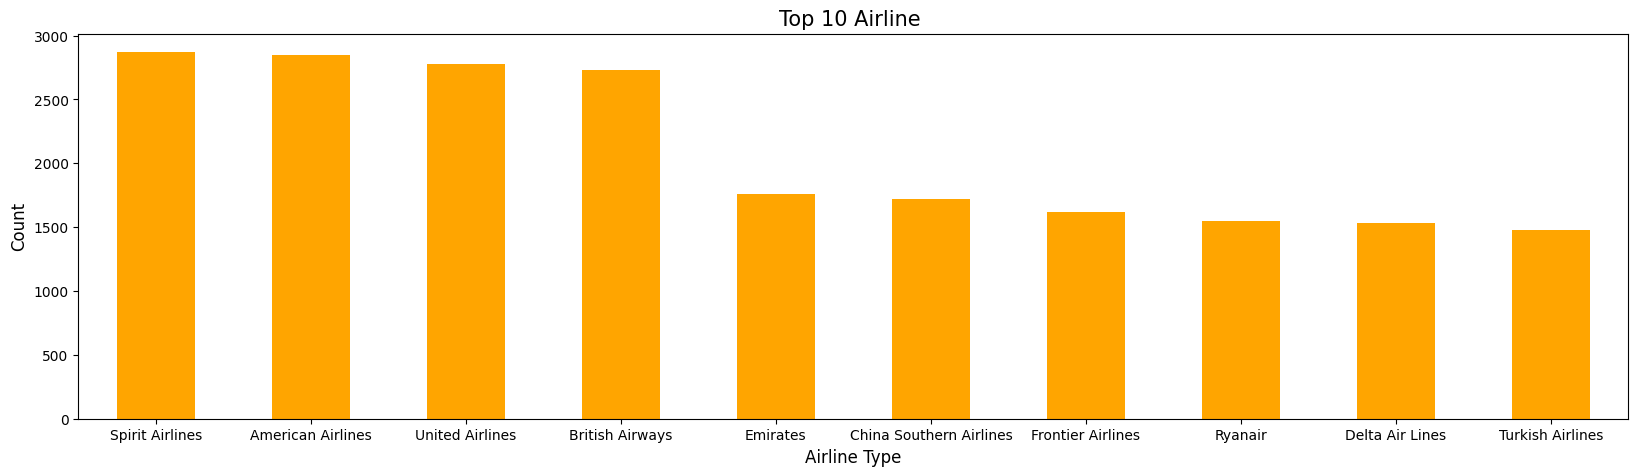

In [29]:
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar',color = 'orange')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

**We have observed that the top 10 airlines with most trips are-**

* Spirit Airlines  
* American Airlines 

* United Airlines 

* British Airways

* Emirates 

* china southern airline 

* frontier airlines 

* ryanair 

* delta air lines 

* turkish airlines

**(9) Comparison of all independent variable/features?**

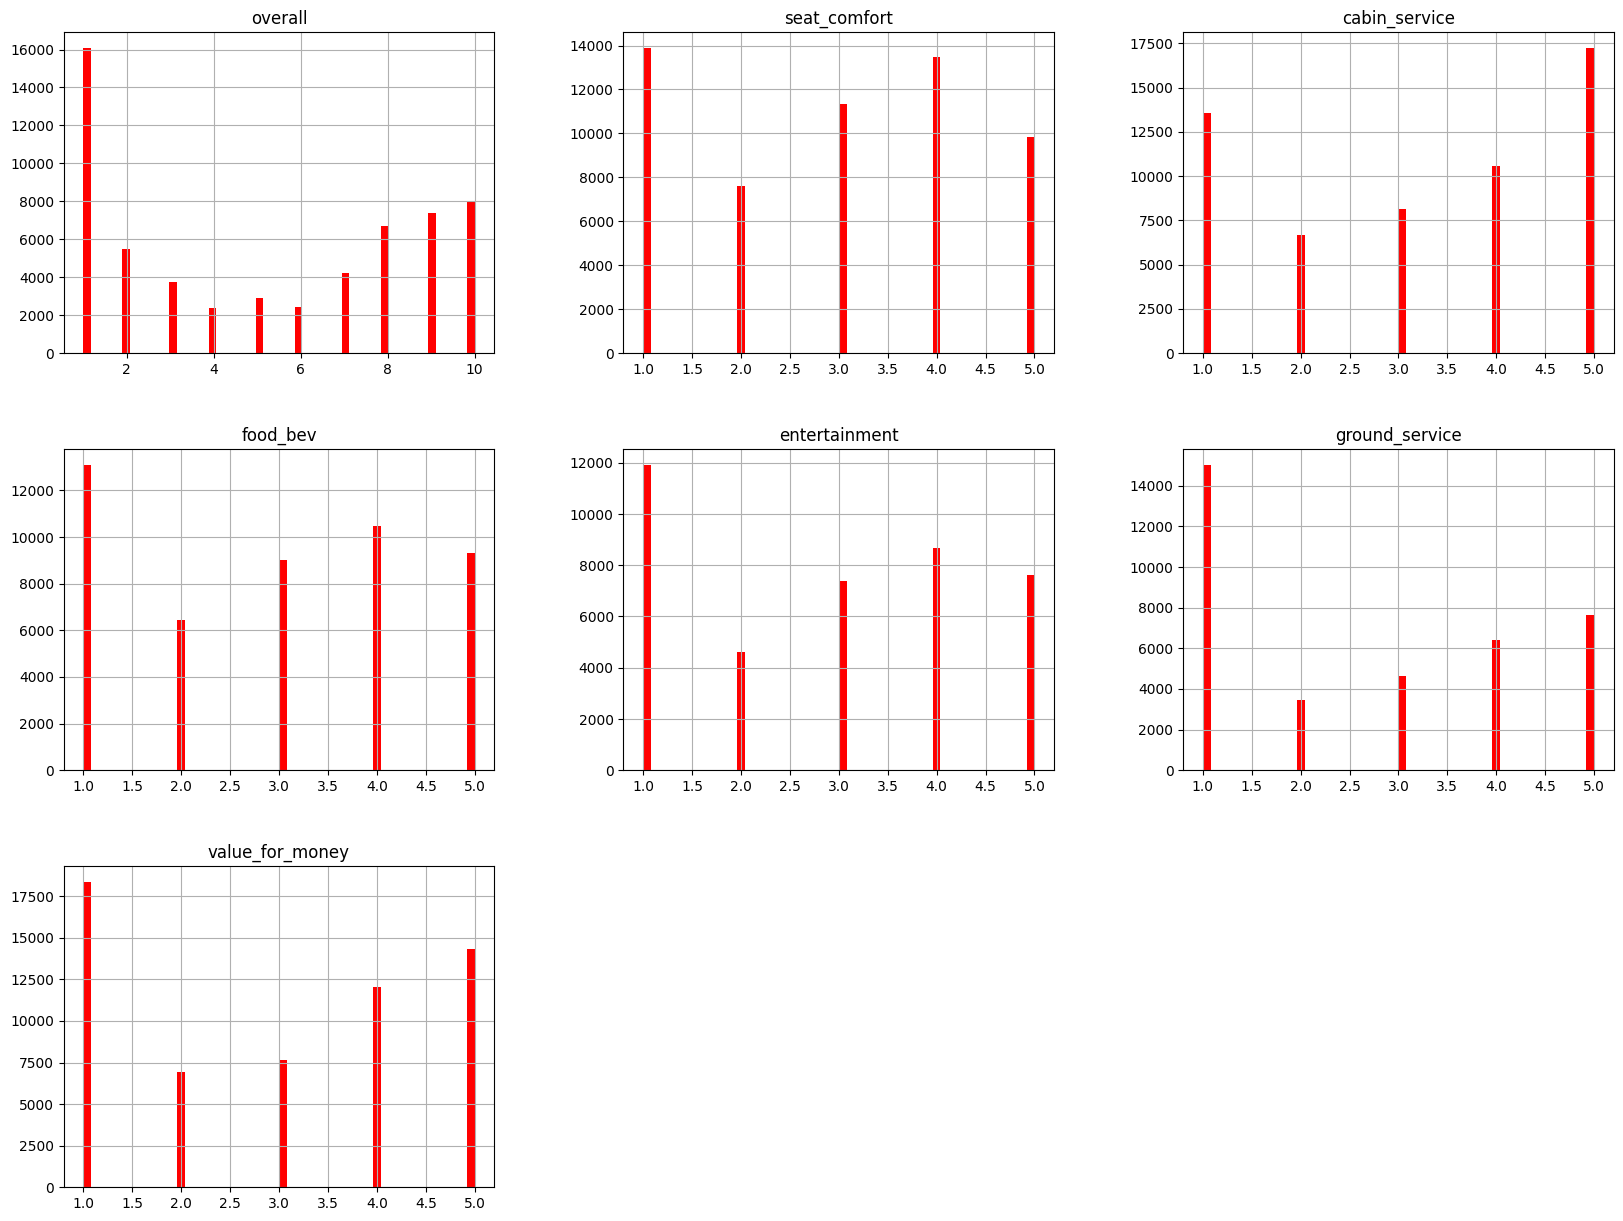

In [30]:
#frequency distribution using histgram
df.hist(bins=50, figsize=(20,15),color = 'red')
plt.show()

* The overall feature ratings of 1 to 2 occur more frequently. 
From Seat comfort feature, We can say that rating of 1 is highest and rating of 2 is the second highest.


* From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

* The food bev feature ratings of 3,4 and 5 are varies equally.Which means their frequency are approximately equal.

* The features of both the entertainment & ground service, We can say that ratings of 1 is highest and ratings of 4 is the second highest.

* From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

# **Droping Unnecessary columns**

In [31]:
#  check null values
df.isnull().sum() 

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [32]:
#Checking Percentage wise missing values.
def missing_values_per_check(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [33]:
#Checking Percentage wise missing values.
missing_values_per_check(df)

,column_name,percent_missing
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [34]:
#Showing the unique aircraft names
df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [35]:
#checking the number of unique aircrafts
df.aircraft.nunique()

2088

**Droping the aircraft column from data as it have highest null values.**

In [36]:
df = df.drop(['aircraft'],axis = 1)

In [37]:
#droping the columns from data which are not for our use
df = df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)
df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


**Reason of droping columns**


* Author - Being the categorical with high Variability not required for prediction.
* Route - Not needed for building a model as it is independent of the Services and Quality of travel.
* Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates. 
* Review_date - Similar to Date_flown
* Customer_review - As it is related to overall review feature of the datasets.

**On the basis of null value percentage we divide our data in two parts-**

**high_null** = columns which have high percentage of null values.

**low_null** = columns which have low percentage of null values.

In [38]:
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [39]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

**This imputation technique replaces missing values with a value that is less extreme than the mean or median, which can be useful in cases where the data is highly skewed or has outliers. However, it's important to note that this technique assumes that the missing values are missing at random and that the distribution of the non-missing values is similar to the distribution of the entire dataset.**

In [40]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(df,col)

**Imputed null values by Quantile-1 for the columns have low null value percentage.**

In [41]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

**Median imputation is a commonly used technique for handling missing data because it is relatively simple and easy to implement. However, it assumes that the missing values are missing at random and that the distribution of the non-missing values is similar to the distribution of the entire dataset. Additionally, median imputation may underestimate the true variance of the data and could bias downstream analyses.**

In [42]:
#Looping the null value column
for col in high_null:
  median_imputation(df,col)

**Imputed null values by Median Imputaion for the columns have high percetage.**

In [43]:
#after imputed null values
df.head(2)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [44]:
#Remove recommended null value row
df.dropna(subset=['recommended'],inplace=True)

In [45]:
df['traveller_type'].fillna(method="ffill",inplace=True)

In [46]:
df['cabin'].fillna(df['cabin'].mode().values[0],inplace=True)

**Filling traveller_type column with Mode Imputation**

**cabin column with Forward fill method.**

In [47]:
df.tail(3)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,1.0,Couple Leisure,Economy Class,2.0,2.0,3.0,3.0,3.0,1.0,no
131892,Ukraine International,1.0,Couple Leisure,Economy Class,2.0,2.0,3.0,3.0,3.0,1.0,no
131894,Ukraine International,1.0,Couple Leisure,Economy Class,2.0,2.0,3.0,3.0,3.0,1.0,no


In [48]:
#Checking the new null value percentage
missing_values_per_check(df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [49]:
df.shape

(59761, 11)

**It is better to work with clean data for prediction rather than huge corrupt data.**

# **Converting target as categorical data into numerical data: 'Label Encoding'**

In [50]:
#converting targeted column
df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [51]:
df.head(2)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0


<Axes: >

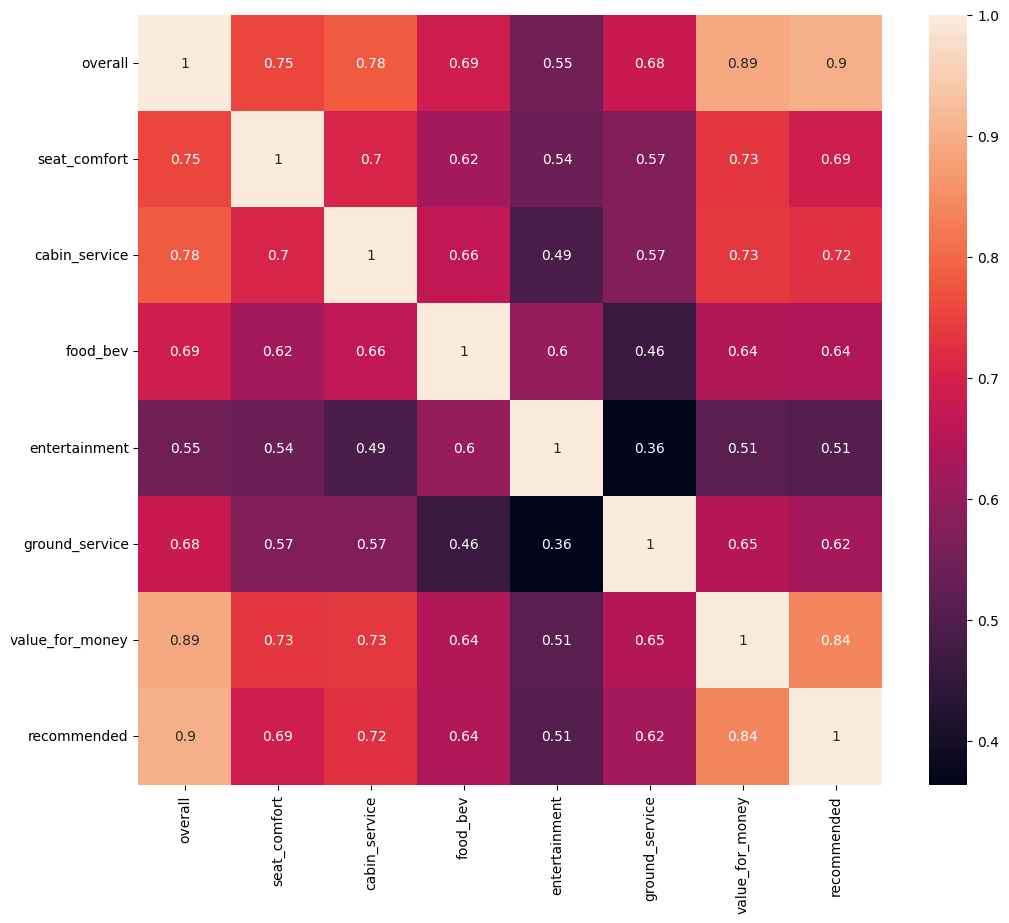

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

# **Correlation plot**

**Multicollinearity is a problem that can occur in statistical models when two or more independent variables are highly correlated with each other. This can cause issues with model interpretation and accuracy, as the effect of each variable on the dependent variable becomes difficult to discern.**

**One way to address multicollinearity is to remove one or more of the correlated independent variables from the model. Here are some steps you can take to identify and remove multicollinearity features:**

**Check for correlations:** Use correlation analysis to check the pairwise correlations between all independent variables in your dataset. You can use a correlation matrix or a scatterplot matrix to visualize the correlations.

**Calculate the variance inflation factor (VIF):** The VIF is a measure of how much the variance of the estimated coefficient of an independent variable increases when that variable is added to a model with other independent variables. A high VIF indicates that the variable is highly correlated with other variables in the model.

**Remove variables with high VIF values:** If you have variables with high VIF values, remove one or more of them from the model. You can use a threshold VIF value, such as 5 or 10, to determine which variables to remove.

**Check the model fit:** After removing multicollinearity features, check the model fit to ensure that the model is still accurate and reliable. You can use techniques such as cross-validation and residual analysis to check the model fit.

**Repeat the process:** If necessary, repeat the process of checking for correlations, calculating VIF values, and removing variables until you have a model with no or acceptable levels of multicollinearity.

**Remember that removing multicollinearity features should be done carefully and with proper justification, as it can affect the overall validity and interpretability of the model.**

**Drop overall column as it has highest correlation value than others.**

In [53]:
#Creating a function to remove multicollinear
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [54]:
calc_vif(df[[i for i in df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [55]:
#drop overall column 
df.drop(["overall"], axis = 1, inplace = True)

In [56]:
# drop airline column
df.drop(["airline"], axis = 1, inplace = True)

**Here we are dropping airline column from our data as it is no usecase further.**

# **Defining the dependent and independent variables.**

In [57]:
#separating the dependent and independent variables
y = df['recommended']
x = df.drop(columns = 'recommended')

In [58]:
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

In [60]:
y

1         1
3         0
5         0
7         1
9         0
         ..
131886    0
131888    0
131890    0
131892    0
131894    0
Name: recommended, Length: 59761, dtype: int64

# **One hot encoding**

**One hot encoding is a technique used to represent categorical variables as numerical data. It is particularly useful in machine learning algorithms, as most algorithms require numerical data as input.**

In [61]:
x = pd.get_dummies(x)

In [62]:
x.shape

(59761, 14)

In [63]:
x.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0
5,1.0,4.0,1.0,3.0,1.0,2.0,1,0,0,0,0,1,0,0
7,4.0,5.0,5.0,5.0,5.0,5.0,0,0,0,1,0,1,0,0
9,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0


In [64]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))


The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


**The Percentage of both labels('yes','no) is approximately equal. So no need of Handling Class Imbalance technique.**

# **Splitting Train and Test Data**

In [66]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

In [67]:
#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [68]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


# **Model-1: Logistic Regression**

**Logistic Regression is a statistical method used for binary classification problems, where the goal is to predict a binary outcome variable (i.e., 0 or 1) based on one or more predictor variables. It is a type of generalized linear model that models the relationship between the predictor variables and the probability of the binary outcome variable.**

In [69]:
#logistic regression fitting 
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [70]:
log_reg.coef_

array([[ 0.29470524,  0.54964494,  0.43522642,  0.24880929,  0.72092498,
         1.63381309,  0.15000711, -0.04985052, -0.15934752,  0.06655806,
         0.14922398, -0.06516326,  0.11367346, -0.19036704]])

In [71]:
log_reg.intercept_

array([-11.84300155])

In [72]:
log_reg.score(x_test,y_test)

0.9324019074709278

In [73]:
y_pred = log_reg.predict(x_test)

In [74]:
#report of logistic regression 
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



### ***93% accuracy with Logistic Regression***

<Axes: >

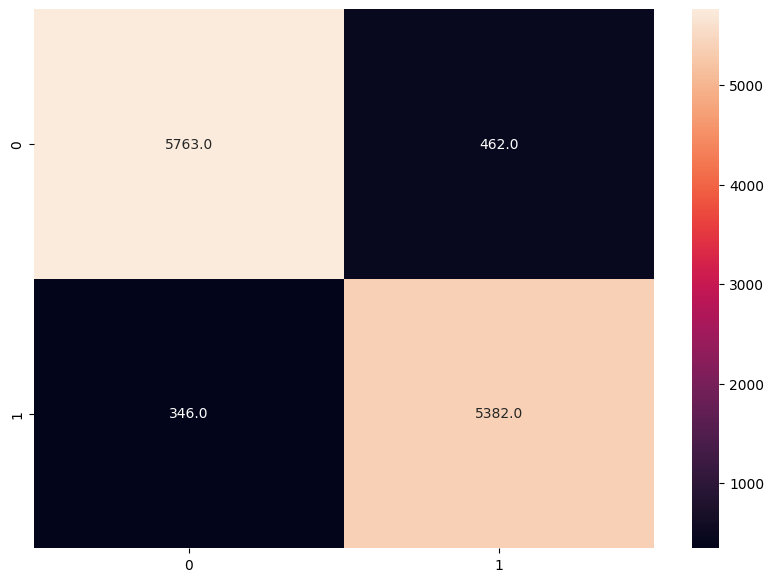

In [75]:
#cofusion matrix of logistic regression 
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

# **Implementing Cross-validated Logistic Regression**

In [76]:
logistic = LogisticRegression()

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


In [79]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9328451882845188, 0.9389640216372515, 0.9441539426898139)

# **Model-2:Fitting Decision Tree Classifer**

In [84]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier(max_depth=2)
#Taining a model with x and y
tree_classify.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [85]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(x_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(x_test,y_test))

Training Accuracy of Decision Tree Model is 0.9160809906291834
Testing Accuracy of Decision Tree Model is 0.9101480799799213


[Text(0.5, 0.8333333333333334, 'x[5] <= 3.5\ngini = 0.499\nsamples = 47808\nvalue = [25043, 22765]'),
 Text(0.25, 0.5, 'x[5] <= 2.5\ngini = 0.194\nsamples = 26728\nvalue = [23815, 2913]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.046\nsamples = 20630\nvalue = [20140, 490]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.479\nsamples = 6098\nvalue = [3675, 2423]'),
 Text(0.75, 0.5, 'x[1] <= 1.5\ngini = 0.11\nsamples = 21080\nvalue = [1228, 19852]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.427\nsamples = 337\nvalue = [233, 104]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.091\nsamples = 20743\nvalue = [995, 19748]')]

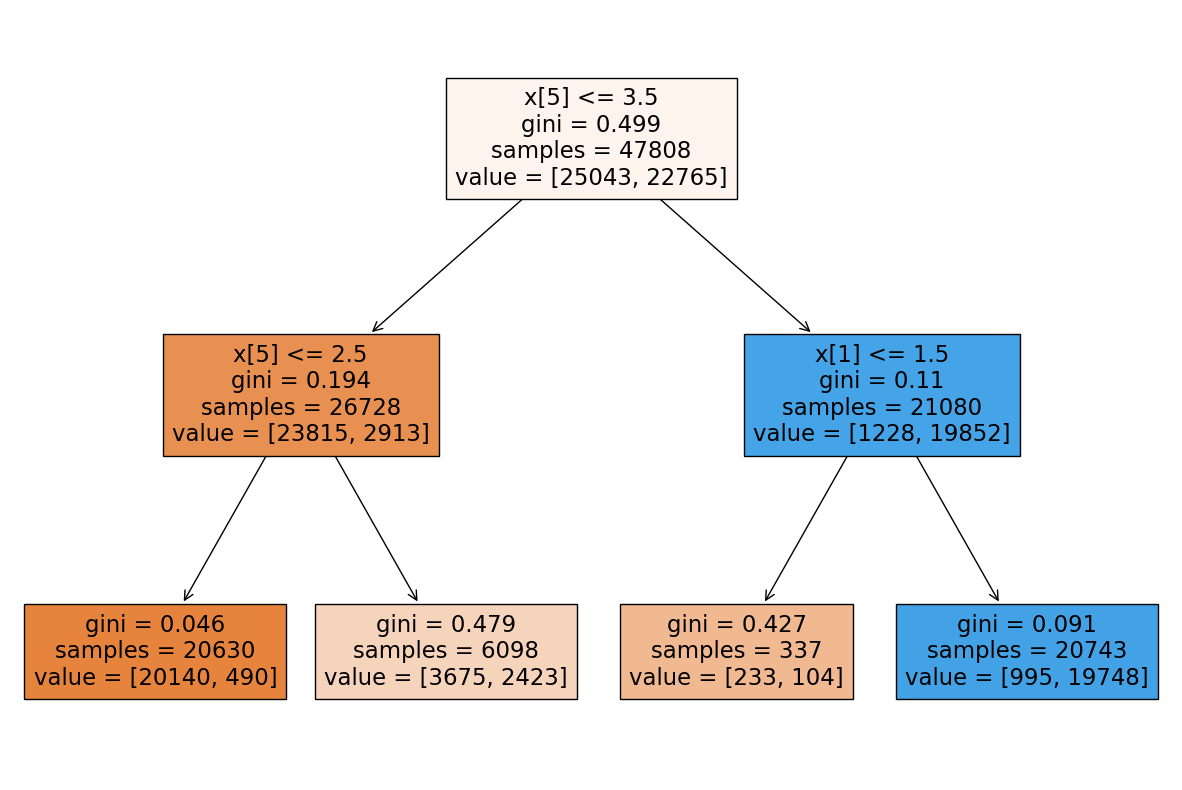

In [87]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_classify,filled=True)

In [86]:
y_pred = tree_classify.predict(x_test)

In [88]:
#report of decision tree 
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6225
           1       0.95      0.86      0.90      5728

    accuracy                           0.91     11953
   macro avg       0.91      0.91      0.91     11953
weighted avg       0.91      0.91      0.91     11953



**Here our model is Overfitted. So Hyperparameter tuning is done to prune a Decision tree to preserve Generalized Model.**

# **Hyperparameter Tuning For Decision Tree**

In [89]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],
              "max_depth":[5,7],
              "min_samples_split":[5,7],
              "min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [90]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [91]:
#calling an best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [92]:
#calling an best score
tree_cv.best_score_

0.9371652678720052

### ***93% accuracy of Decision Tree with the help of hypermatring tunning.***

# **Model-3:Fitting Random Forest**

In [93]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
random_forest.score(x_test,y_test)

0.9292227892579269

In [95]:
#report of decision tree 
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6225
           1       0.95      0.86      0.90      5728

    accuracy                           0.91     11953
   macro avg       0.91      0.91      0.91     11953
weighted avg       0.91      0.91      0.91     11953



### ***92% accuracy with Random Forest***

# **Implementing Cross-validated Random Forest**

In [96]:
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)

In [97]:
random_forest_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [98]:
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

# **Model-4:K-Nearest Neighbour**

In [99]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [100]:
y_pred = k_neighbor.predict(x_test)

In [101]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train, y_train)
print(train_accuracy)
# Compute accuracy on the test set
test_accuracy = k_neighbor.score(x_test, y_test) 
print(test_accuracy)

0.9493390227576974
0.9293901112691375


### **92% accuracy with K-Nearest-Neighbor**

<Axes: >

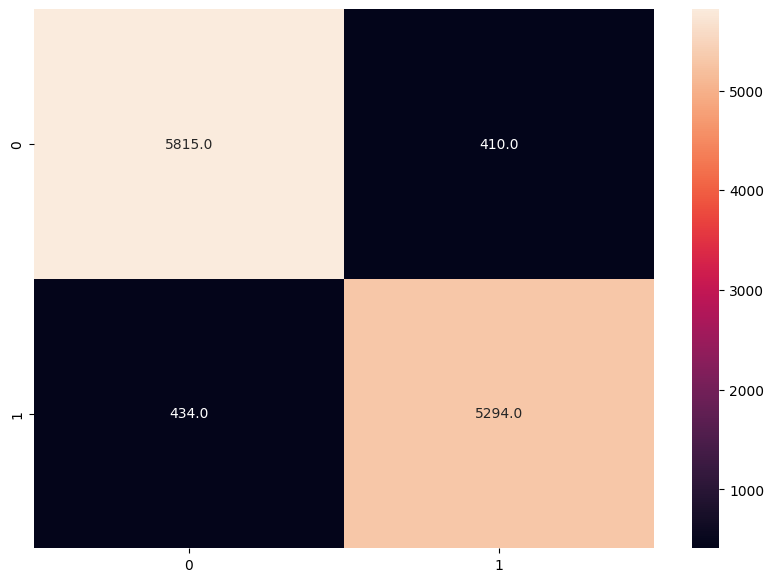

In [102]:
#cofusion matrix of logistic regression 
confuse_matrix_k_neighbor = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_k_neighbor, annot=True, fmt = ".1f")

**The Area Under the ROC Curve (AUC-ROC) is a commonly used evaluation metric in machine learning for binary classification problems. It measures the ability of a model to distinguish between positive and negative classes.**

**The AUC-ROC score is a value between 0 and 1, where a score of 0.5 indicates that the model has no ability to distinguish between positive and negative classes, while a score of 1 indicates a perfect classifier.**

**To compute the AUC-ROC score, we first calculate the True Positive Rate (TPR) and False Positive Rate (FPR) for various threshold values. Then, we plot the TPR against the FPR to obtain the ROC curve, and calculate the area under the curve.**

In [103]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

0.9291841948800791

# **Model-5:Support Vector Machine**

In [104]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

SVC(kernel='linear')

In [105]:
#score for support vector machine
support_vector.score(x_test, y_test)

0.9318162804316907

### ***93% accuracy with support vector machine***

In [106]:
y_pred = support_vector.predict(x_test)

<Axes: >

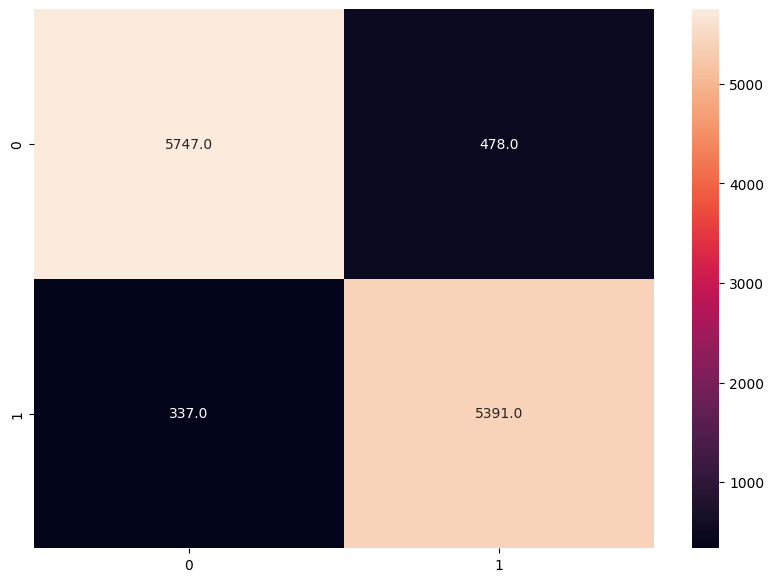

In [107]:
#cofusion matrix of logistic regression 
support_vector_con_mat = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(support_vector_con_mat, annot=True, fmt = ".1f")

# **Model-6:Naïve Bayes Classifier**

In [108]:
#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [109]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

0.9177543507362784

### ***91% accuracy with naive bayes classifier***

In [110]:
# making predictions on the testing set
y_pred = naive_bayes.predict(x_test)

In [111]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 91.0901029030369


# **Accuracy Metrics for All Fitted Model**

In [112]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics



In [113]:
models=[log_reg,tree_cv,random_forest,k_neighbor,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning',
      'Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector',
      'naive bayes']

In [115]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.938985    0.932402
1  Precsion_Score     0.928165    0.920945
2    Recall_Score     0.945003    0.939595
3   Roc_Auc_Score     0.939259    0.932689

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.941014    0.933155
1  Precsion_Score     0.934361    0.926458
2    Recall_Score     0.942324    0.934707
3   Roc_Auc_Score     0.941074    0.933217

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974544    0.929223
1  Precsion_Score     0.970727    0.926599
2    Recall_Score     0.975972    0.925628
3   Roc_Auc_Score     0.974609    0.929079

-*-*--*-*--*-*-k_neighbor-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.949339  

# **Conclusion**


  **The Models used for this Classsification problem are**

 1. Logistic Regression Model
 2. Decision Tree Model
 3. Random Forest Model
 4. K-Nearest Neighbor Model
 5. Support Vector Machine Model 
 6. Naive Bayes

**In conclusion, our analysis of the Airline-Passenger-Referral-Prediction problem demonstrated the effectiveness of machine learning algorithms in predicting customer behavior based on past behavior and demographic information. Our best-performing model, a Random Forest Classifier, achieved a high accuracy on the testing set, indicating that it can be used to predict whether a given passenger will refer a friend to the airline with a high degree of accuracy. The feature importances of the model provided insights into the factors that are most important in predicting customer behavior, which can be used to inform marketing and customer engagement strategies. Overall, our analysis highlights the value of data-driven approaches in understanding and predicting customer behavior in the airline industry.**

* We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbor ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

* Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given __first priority__ , Accuray is given __second priority__ , and ROC AUC is given __third priority__

* We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.* We can conclude that LogisticRegression gives the best model.

* model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

* The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

* The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

* As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort.